In [72]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import pickle

In [73]:
data = np.genfromtxt('data/airfoil_self_noise.dat')

In [74]:
data

array([[8.00000e+02, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03,
        1.26201e+02],
       [1.00000e+03, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03,
        1.25201e+02],
       [1.25000e+03, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03,
        1.25951e+02],
       ...,
       [4.00000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02,
        1.06604e+02],
       [5.00000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02,
        1.06224e+02],
       [6.30000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02,
        1.04204e+02]])

In [75]:
dat = pd.DataFrame(data)

In [76]:
dat

,0,1,2,3,4,5
0,800.0,0.0,0.3048,71.3,0.002663,126.201
1,1000.0,0.0,0.3048,71.3,0.002663,125.201
2,1250.0,0.0,0.3048,71.3,0.002663,125.951
3,1600.0,0.0,0.3048,71.3,0.002663,127.591
4,2000.0,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500.0,15.6,0.1016,39.6,0.052849,110.264
1499,3150.0,15.6,0.1016,39.6,0.052849,109.254
1500,4000.0,15.6,0.1016,39.6,0.052849,106.604
1501,5000.0,15.6,0.1016,39.6,0.052849,106.224


In [77]:
col =['Freq', 'Angle','Chord_len', 'Free_velocity','Suction','Pressure_level']

In [78]:
dataset = pd.DataFrame(data, columns=col)

In [79]:
dataset.head()

,Freq,Angle,Chord_len,Free_velocity,Suction,Pressure_level
0,800.0,0.0,0.3048,71.3,0.002663,126.201
1,1000.0,0.0,0.3048,71.3,0.002663,125.201
2,1250.0,0.0,0.3048,71.3,0.002663,125.951
3,1600.0,0.0,0.3048,71.3,0.002663,127.591
4,2000.0,0.0,0.3048,71.3,0.002663,127.461


In [80]:
X = dataset.iloc[:,:-1]
X.head()

,Freq,Angle,Chord_len,Free_velocity,Suction
0,800.0,0.0,0.3048,71.3,0.002663
1,1000.0,0.0,0.3048,71.3,0.002663
2,1250.0,0.0,0.3048,71.3,0.002663
3,1600.0,0.0,0.3048,71.3,0.002663
4,2000.0,0.0,0.3048,71.3,0.002663


In [81]:
Y = dataset.iloc[:,[-1]]
Y.head()

,Pressure_level
0,126.201
1,125.201
2,125.951
3,127.591
4,127.461


In [82]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state = 200, shuffle = True)

In [83]:
degree = 5

poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
x_val_poly = poly.transform(X_val)
print(X_train_poly.shape)

(1202, 252)


In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
sc = StandardScaler()

In [86]:
sc.fit(X_train_poly)
X_train_scaled = sc.transform(X_train_poly)
x_val_scaled = sc.transform(x_val_poly)

In [87]:
model = Ridge(alpha = 10)
model.fit(X_train_scaled ,y_train)

Ridge(alpha=10)

In [88]:
train_score = model.score(X_train_scaled,y_train)
print(train_score)

0.7789531262810077


In [89]:
val_score = model.score(x_val_scaled,y_val)
print(val_score)

0.7712271065458178


In [112]:
params = {}
params['degrees'] = [1,2,3,4,5,6,7,8,9,10]
params['alpha'] = [0.001, 0.01,10,50]

In [134]:
def fit(X_train_scaled,y_train,x_val_scaled, y_val, degree , alpha, grid_search = False, exp_name = None):

    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    x_val_poly = poly.fit_transform(X_val)


    sc = StandardScaler()
    sc.fit(X_train_poly)
    X_train_scaled = sc.transform(X_train_poly)
    x_val_scaled = sc.transform(x_val_poly)


    model = Ridge(alpha)
    model.fit(X_train_scaled, y_train)

    train_score =model.score(X_train_scaled, y_train)
    val_score = model.score(x_val_scaled, y_val)


    if grid_search:

        scores = [exp_name, degree, alpha, train_score, val_score]
        return scores

    else:

        print('Train Score :',  train_score)
        print('Val Score :', val_score)
        return model,poly,sc



In [135]:
from tqdm.notebook import tqdm

In [136]:
result = []
exp_id = 1

for i in tqdm(range(len(params['degrees']))) :

    degree  = params['degrees'][i]

    for j in range(len(params['alpha'])):

        alpha = params['alpha'][j]

        exp_name = 'exp ' + str(exp_id)
        exp_id = exp_id + 1
        result.append(fit(X_train_scaled, y_train, x_val_scaled, y_val, degree, alpha, grid_search= True,exp_name=exp_name))

result

[['exp 1', 1, 0.001, 0.515867354931832, 0.5089075290116494],
 ['exp 2', 1, 0.01, 0.5158673548050732, 0.5089085310531605],
 ['exp 3', 1, 10, 0.5157458279330288, 0.5098531231870799],
 ['exp 4', 1, 50, 0.5133380150683247, 0.5109521084126676],
 ['exp 5', 2, 0.001, 0.6464257811688595, 0.6304892882243656],
 ['exp 6', 2, 0.01, 0.6464256857807572, 0.6305049449277609],
 ['exp 7', 2, 10, 0.6423810060831803, 0.6325905057450878],
 ['exp 8', 2, 50, 0.634839810968838, 0.628428325473595],
 ['exp 9', 3, 0.001, 0.7580936812098847, 0.7532757020396919],
 ['exp 10', 3, 0.01, 0.7580208202726478, 0.7534501742646619],
 ['exp 11', 3, 10, 0.7170890822231131, 0.6971517738329016],
 ['exp 12', 3, 50, 0.6873370682561392, 0.6720369082501444],
 ['exp 13', 4, 0.001, 0.8524225953778665, 0.8357727211589172],
 ['exp 14', 4, 0.01, 0.8469682047389937, 0.8331385714124365],
 ['exp 15', 4, 10, 0.7618999579094051, 0.7508347989248241],
 ['exp 16', 4, 50, 0.7300828804399164, 0.7114251859178534],
 ['exp 17', 5, 0.001, 0.89741670

In [137]:
result_df = pd.DataFrame(result, columns=['Experiment_id' ,'Degree', 'Alpha' ,'Train score', 'Val Score' ])
result_df

,Experiment_id,Degree,Alpha,Train score,Val Score
0,exp 1,1,0.001,0.515867,0.508908
1,exp 2,1,0.010,0.515867,0.508909
2,exp 3,1,10.000,0.515746,0.509853
3,exp 4,1,50.000,0.513338,0.510952
4,exp 5,2,0.001,0.646426,0.630489
5,exp 6,2,0.010,0.646426,0.630505
6,exp 7,2,10.000,0.642381,0.632591
7,exp 8,2,50.000,0.634840,0.628428
8,exp 9,3,0.001,0.758094,0.753276
9,exp 10,3,0.010,0.758021,0.753450


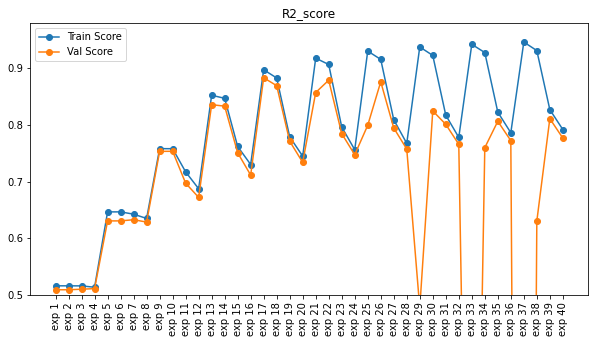

In [138]:
plt.figure(figsize=(10,5), facecolor= 'white')
plt.title('R2_score')

plt.plot(result_df['Train score'], marker = 'o', label = 'Train Score')
plt.plot(result_df['Val Score'], marker = 'o', label = 'Val Score')
plt.xticks(list(range(len(result_df))), result_df['Experiment_id'], rotation = 90)
plt.ylim((0.5,0.98))
plt.legend()
plt.show()

In [139]:
result_df.sort_values(by='Val Score', ascending = False)

,Experiment_id,Degree,Alpha,Train score,Val Score
16,exp 17,5,0.001,0.897417,0.883250
21,exp 22,6,0.010,0.906715,0.878969
25,exp 26,7,0.010,0.915716,0.876159
17,exp 18,5,0.010,0.882918,0.869339
20,exp 21,6,0.001,0.917903,0.857220
12,exp 13,4,0.001,0.852423,0.835773
13,exp 14,4,0.010,0.846968,0.833139
29,exp 30,8,0.010,0.922752,0.824750
38,exp 39,10,10.000,0.826980,0.811092
34,exp 35,9,10.000,0.822569,0.806452


In [140]:
result_df.loc[result_df['Experiment_id'] == 'exp 17']

,Experiment_id,Degree,Alpha,Train score,Val Score
16,exp 17,5,0.001,0.897417,0.88325


In [143]:
best_model,poly, sc = fit(X_train_scaled,y_train, x_val_scaled,y_val, degree=5 , alpha=0.001)

Train Score : 0.8974167010135646
Val Score : 0.8832502905769938


In [144]:
from pickle import dump

In [154]:
dump(best_model, open('best_model.pkl', 'wb'))
dump(poly, open('poly.pkl','wb'))
dump(sc, open('scaler.pkl','wb'))

In [155]:
from pickle import load

In [156]:
loaded_model = load(open('best_model.pkl','rb'))
poly = load(open('poly.pkl', 'rb'))
sc = load(open('scaler.pkl','rb'))

In [162]:
def prediction(mode, poly, sc):

    l = []
    l.append(float(input('Enter Frequency : ')))
    l.append(float(input('Enter Angle : ')))
    l.append(float(input('Enter Chord length : ')))
    l.append(float(input('Enter Velocity : ')))
    l.append(float(input('Enter Sucction : ')))

    arr = np.asarray([l])
    arr = poly.transform(arr)
    scaled_arr = sc.transform(arr)
    print('Pressure Level :', round(model.predict(scaled_arr)[0][0],2))

In [163]:
prediction(loaded_model, poly, sc)

Pressure Level : 125.49
